In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def analytic_flexure(x, Te, v0, rhoi=1.0e3):    
    E = 1.0e11 # Módulo de Young [Pa]
    v = 0.25 # Coeficiente de Poisson
    g = 9.8 # Aceleração da gravidade [m/s²]

    rhom =  3300 # Densidade do manto

    D = E*Te**3/(12*(1-v**2))

    alpha = np.power(4*D/((rhom-rhoi)*g), 0.25)

    w0 = v0*alpha**3/(8*D)

    xa = np.abs(x)

    w = w0*np.exp(-xa/alpha)*(np.cos(xa/alpha)+np.sin(xa/alpha))
    return w

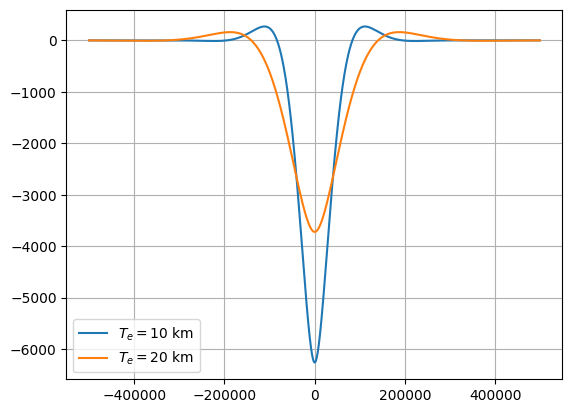

In [12]:
x = np.arange(-500e3, 500.0e3,1000)

Te = 10e3 # Espessura elástica efetiva
v0 = -1.0e13

w1 = analytic_flexure(x,Te,v0) # Vertical movement



Te2 = 20e3 # Espessura elástica efetiva
w2 = analytic_flexure(x,Te2,v0)



plt.plot(x, w1, label="$T_e = 10$ km")

plt.plot(x, w2, label="$T_e = 20$ km")
plt.grid()
plt.legend()

### Fourth derivative of w in finite differences

$ \frac{\delta ^4w}{\delta x^4} = \frac{W_{i+2}-4W_{i+1}+6W_i-4W_{i-1}+W_{i-2}}{\Delta x^4}$